In [1]:
from collections import Counter

In [2]:
def count_words(text):
    """
    Counts the number of unique words in a text(str). Returns a dictionary with keys as words and
    values as frequency of words. No punctuation.
    """
    text = text.lower()
    special_chars = [".", ",", ":", ";", "'", '"']
    for char in special_chars:
        text = text.replace(char, "")
    
    words_dictionary = Counter(text.split(" "))
    return words_dictionary

In [3]:
def read_book(title_path):
    """
    Read a book and return it as a string.
    """
    with open(title_path, "r", encoding="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text

In [4]:
filepath = "./Books/English/shakespeare/Romeo and Juliet.txt"

In [5]:
text = read_book(filepath)

In [6]:
len(text)

169275

In [7]:
ind = text.find("What's in a name?")

In [8]:
ind

42757

In [9]:
sample_text = text[ind: ind+1000]

In [10]:
sample_text

"What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the place death, consid

In [11]:
def word_stats(word_counts):
    """
    Return number of unique words and word frequencies.
    """
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

In [12]:
word_counts = count_words(text)

In [13]:
(num_unique, counts) = word_stats(word_counts)

In [14]:
num_unique

5118

In [15]:
sum(counts)

40776

## Comparison between German and English translations of Romeo and Juliet

In [16]:
text_English = read_book("./Books/English/shakespeare/Romeo and Juliet.txt")
word_counts = count_words(text_English)
(num_unique, counts) = word_stats(word_counts)
print(num_unique, sum(counts))

5118 40776


In [17]:
text_German = read_book("./Books/German/shakespeare/Romeo und Julia.txt")
word_counts = count_words(text_German)
(num_unique, counts) = word_stats(word_counts)
print(num_unique, sum(counts))

7527 20311


## Reading multiple files across directories

In [18]:
import os
import pandas as pd

In [19]:
stats = pd.DataFrame(columns = ("language", "author", "title", "length", "unique"))

In [20]:
title_num = 1

In [21]:
book_dir = "./Books"

In [22]:
os.listdir(book_dir)

['English', 'French', 'German', 'Portuguese']

In [23]:
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            # print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt", ""), sum(counts), num_unique
            title_num += 1

In [24]:
stats.head()

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449


## Plotting Book Statistics

In [25]:
import matplotlib.pyplot as plt

In [26]:
numWords = stats.length
unqWords = stats.unique

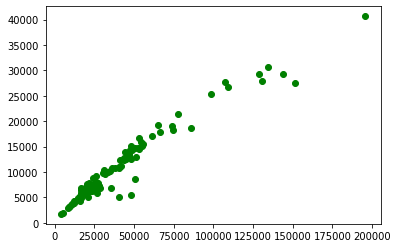

In [27]:
plt.plot(numWords, unqWords, "go");

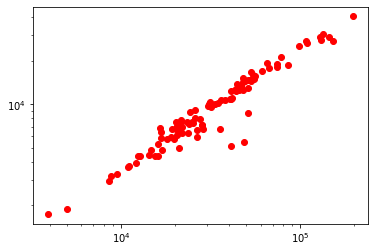

In [28]:
plt.loglog(numWords, unqWords, "ro");

Plot a graph for each of the 4 languages.

In [29]:
languages = stats.language.unique()
colors = ["ro", "bo", "go" , "yo"]

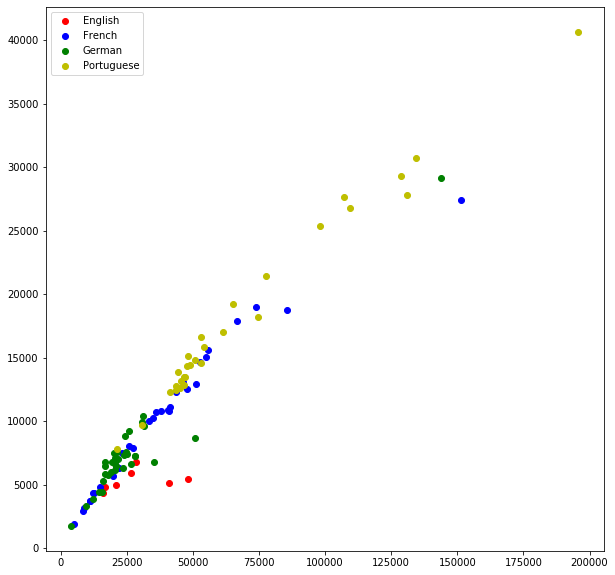

In [30]:
plt.figure(figsize = (10, 10))
for i in range(4):
    nWords = stats[stats.language == languages[i]].length
    nUnique = stats[stats.language == languages[i]].unique
    plt.plot(nWords, nUnique, colors[i], label = languages[i])
plt.legend()
plt.show()